<a href="https://colab.research.google.com/github/DuncanC82/Reactivities/blob/main/AKLLFights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import datetime
import pandas as pd

# Your API credentials
client_id = "yGpRRPpchKInvA6qeEwLA1GeWAhZCjLp"
client_secret = "NerwPLPX6TQasvAy"

# Get access token
auth_response = requests.post(
    "https://test.api.amadeus.com/v1/security/oauth2/token",
    data={
        "client_id": client_id,
        "client_secret": client_secret,
        "grant_type": "client_credentials",
    },
)
auth_response.raise_for_status()  # Ensure we got a successful response
access_token = auth_response.json()["access_token"]

# List of origins
origins = ['MEL', 'HNL', 'BNE', 'RAR', 'CNS', 'ADL', 'SYD', 'SIN', 'OOL', 'CHC', 'WLG', 'PVG']

# Destination
destination = 'AKL'

# Create a list to store all flight details
all_flight_details = []

# Loop through each week for the next 15 weeks
for n in range(12):
    # Compute the date of the search
    day = datetime.datetime.now() + datetime.timedelta(weeks=n)
    
    # Loop through each origin
    for origin in origins:
        # Make API request
        response = requests.get(
            "https://test.api.amadeus.com/v2/shopping/flight-offers",
            headers={"Authorization": f"Bearer {access_token}"},
            params={
                "originLocationCode": origin,
                "destinationLocationCode": destination,
                "departureDate": day.strftime("%Y-%m-%d"),
                "adults": 1,
            },
        )
        response.raise_for_status()  # Ensure we got a successful response

        # Append each flight detail to the list
        for offer in response.json()["data"]:
            for segment in offer["itineraries"][0]["segments"]:
                flight_detail = {
                    'origin': segment['departure']['iataCode'],
                    'destination': segment['arrival']['iataCode'],
                    'departure_time': segment['departure']['at'],
                    'arrival_time': segment['arrival']['at'],
                    'duration': segment['duration']
                }
                all_flight_details.append(flight_detail)

# Convert all_flight_details to a DataFrame
df = pd.DataFrame(all_flight_details)

# Sort by departure time in descending order
df = df.sort_values(by='departure_time', ascending=False)




In [ ]:
df

,origin,destination,departure_time,arrival_time,duration
25162,SYD,AKL,2023-09-03T09:55:00,2023-09-03T15:05:00,PT3H10M
25156,NAN,AKL,2023-09-03T08:30:00,2023-09-03T11:45:00,PT3H15M
25448,BNE,AKL,2023-09-02T18:05:00,2023-09-02T23:20:00,PT3H15M
25451,BNE,AKL,2023-09-02T18:05:00,2023-09-02T23:20:00,PT3H15M
25155,APW,NAN,2023-09-02T16:55:00,2023-09-02T18:00:00,PT2H5M
...,...,...,...,...,...
147,HNL,LAX,2023-05-25T08:00:00,2023-05-25T16:34:00,PT5H34M
150,HNL,LAX,2023-05-25T08:00:00,2023-05-25T16:34:00,PT5H34M
145,HNL,SFO,2023-05-25T07:00:00,2023-05-25T15:15:00,PT5H15M
168,HNL,SFO,2023-05-25T07:00:00,2023-05-25T15:15:00,PT5H15M


In [ ]:
import pandas as pd

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(all_flight_details)

# Convert the 'departure_time' and 'arrival_time' columns to datetime format
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

# Now, 'df' is a DataFrame with the columns 'origin', 'destination', 'departure_time', 'arrival_time', and 'duration'
print(df)


In [ ]:
pip install matplotlib seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include direct flights from specific origins
df_direct = df[df['origin'].isin(origins)]

# Create a new column for departure date (without time)
df_direct['departure_date'] = df_direct['departure_time'].dt.date

# Count the number of direct flights per day from each origin
flights_per_day = df_direct.groupby(['origin', 'departure_date']).size().reset_index(name='num_flights')

# Normalize the data
flights_per_day['num_flights_normalized'] = flights_per_day.groupby('origin')['num_flights'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Pivot the data for plotting
flights_per_day_pivot = flights_per_day.pivot("departure_date", "origin", "num_flights_normalized")

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=flights_per_day_pivot)
plt.title('Number of direct flights from each origin over time (Normalized)')
plt.xlabel('Departure date')
plt.ylabel('Normalized number of flights')
plt.show()






<ipython-input-30-5aaf98d2abea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direct['departure_date'] = df_direct['departure_time'].dt.date


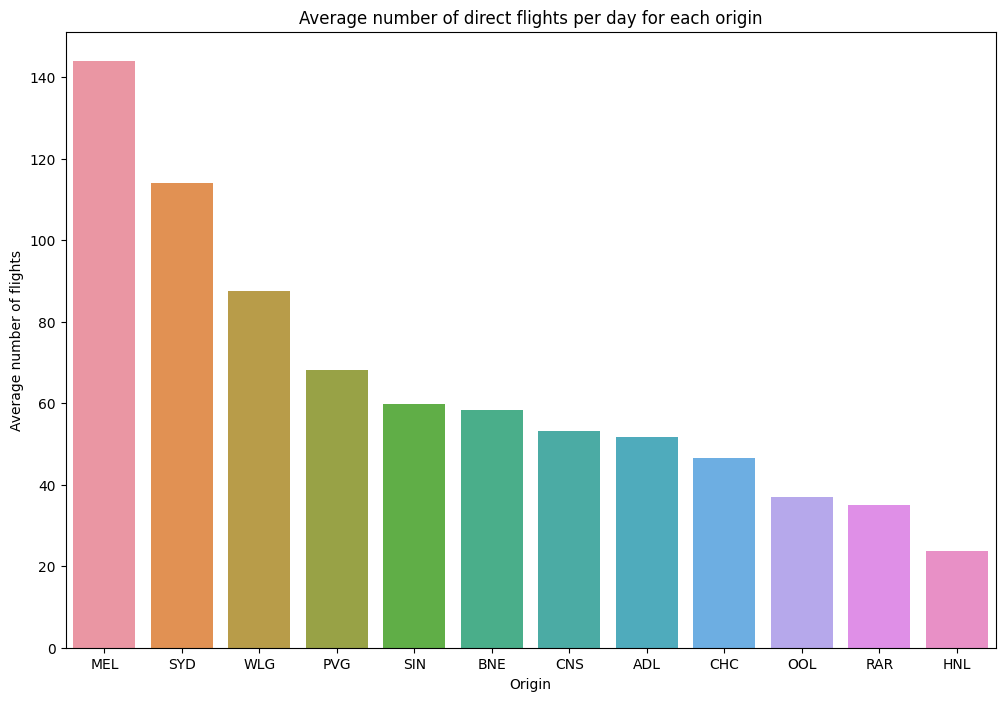

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include direct flights from specific origins
df_direct = df[df['origin'].isin(origins)]

# Create a new column for departure date (without time)
df_direct['departure_date'] = df_direct['departure_time'].dt.date

# Count the number of direct flights per day from each origin
flights_per_day = df_direct.groupby(['origin', 'departure_date']).size().reset_index(name='num_flights')

# Calculate the average number of direct flights per day for each origin
average_flights_per_origin = flights_per_day.groupby('origin')['num_flights'].mean().reset_index(name='avg_num_flights')

# Sort the data by average number of flights in descending order
average_flights_per_origin = average_flights_per_origin.sort_values('avg_num_flights', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=average_flights_per_origin, x='origin', y='avg_num_flights')
plt.title('Average number of direct flights per day for each origin')
plt.xlabel('Origin')
plt.ylabel('Average number of flights')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include direct flights from specific origins
df_direct = df[df['origin'].isin(origins)]

# Create a new column for departure date (without time)
df_direct['departure_date'] = df_direct['departure_time'].dt.date

# Count the number of direct flights per day from each origin
flights_per_day = df_direct.groupby(['origin', 'departure_date']).size().reset_index(name='num_flights')

# Pivot the data for plotting
flights_per_day_pivot = flights_per_day.pivot("departure_date", "origin", "num_flights")

# Plot the trend over time for each origin
plt.figure(figsize=(12, 8))
for origin in origins:
    sns.lineplot(data=flights_per_day_pivot[origin], label=origin)

plt.title('Number of direct flights from each origin over time')
plt.xlabel('Departure date')
plt.ylabel('Number of flights')
plt.legend()
plt.show()


<ipython-input-35-650eb68b4f4e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direct['departure_date'] = df_direct['departure_time'].dt.date
<ipython-input-35-650eb68b4f4e>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_per_day_pivot = flights_per_day.pivot("departure_date", "origin", "num_flights")


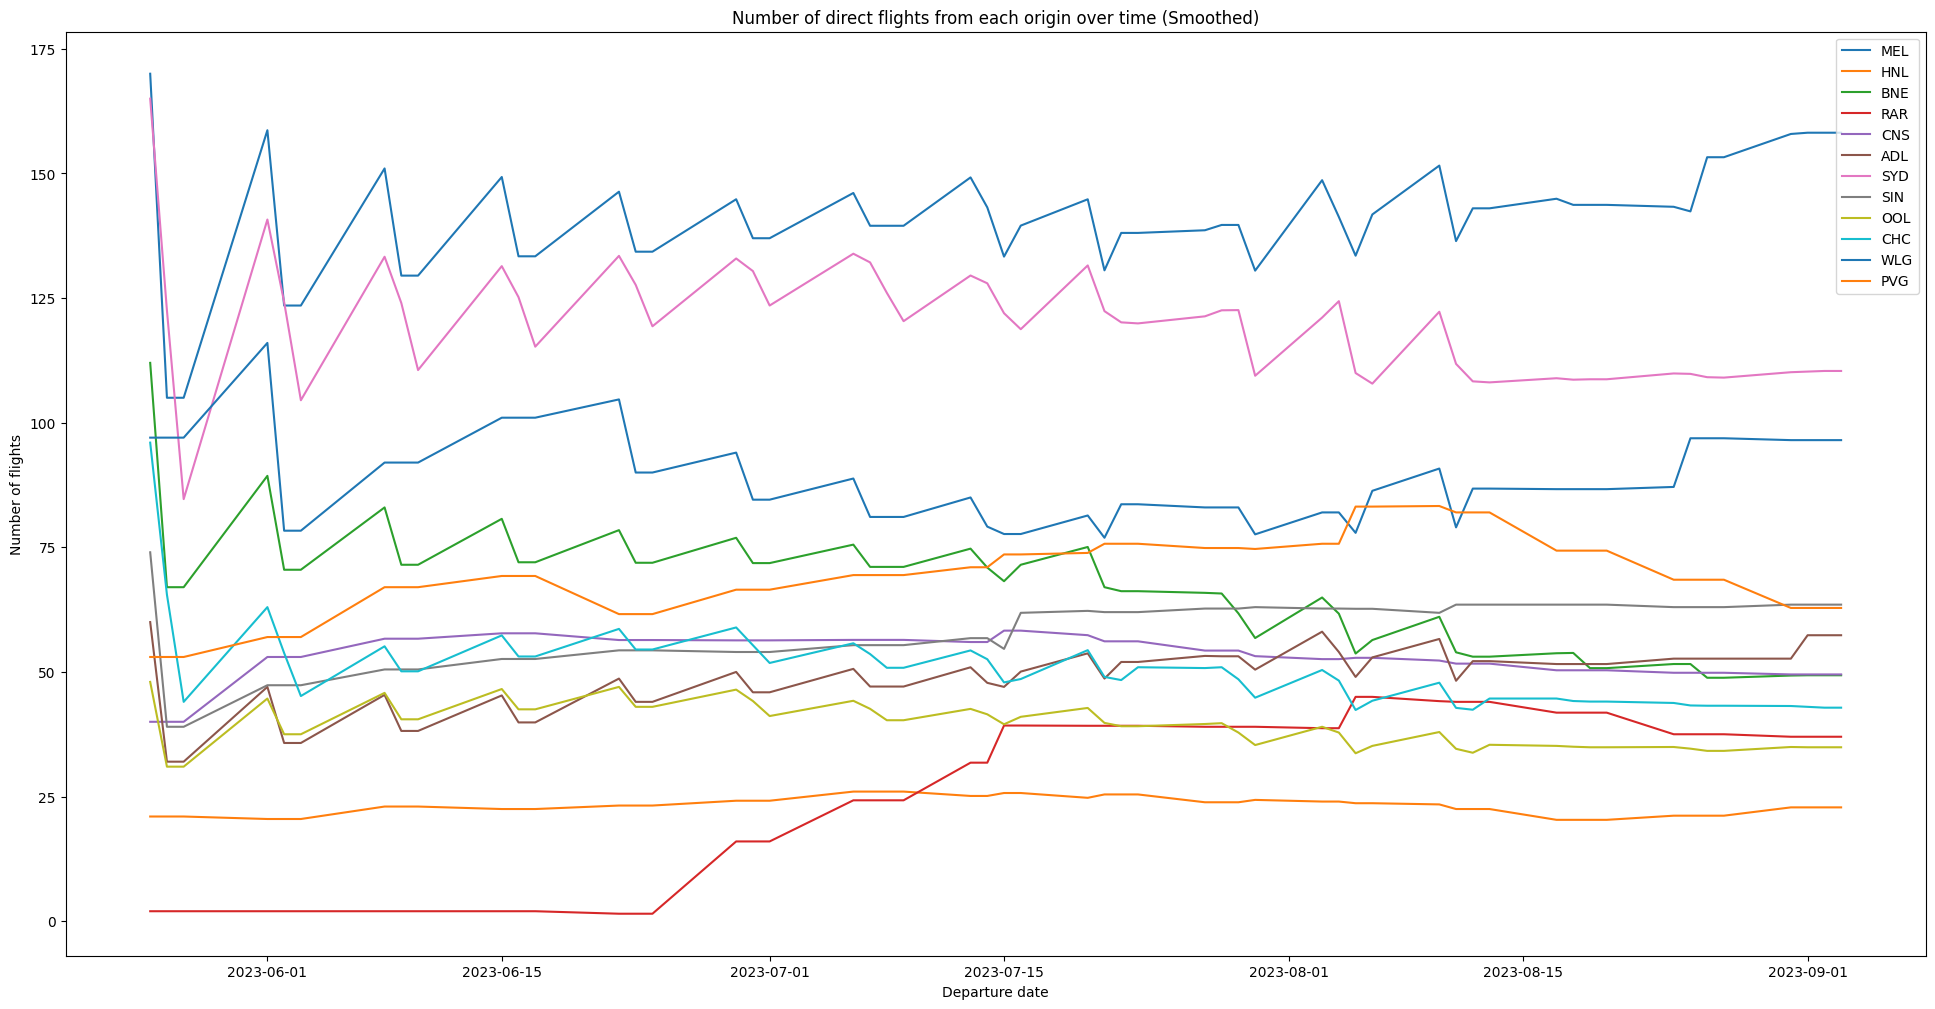

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include direct flights from specific origins
df_direct = df[df['origin'].isin(origins)]

# Create a new column for departure date (without time)
df_direct['departure_date'] = df_direct['departure_time'].dt.date

# Count the number of direct flights per day from each origin
flights_per_day = df_direct.groupby(['origin', 'departure_date']).size().reset_index(name='num_flights')

# Pivot the data for plotting
flights_per_day_pivot = flights_per_day.pivot("departure_date", "origin", "num_flights")

# Apply rolling average to smooth out the data
window_size = 24  # Adjust the window size as desired
flights_per_day_pivot_smoothed = flights_per_day_pivot.rolling(window_size, min_periods=1).mean()

# Plot the trend over time for each origin with smoothed data
plt.figure(figsize=(24, 12))
for origin in origins:
    sns.lineplot(data=flights_per_day_pivot_smoothed[origin], label=origin)

plt.title('Number of direct flights from each origin over time (Smoothed)')
plt.xlabel('Departure date')
plt.ylabel('Number of flights')
plt.legend()
plt.show()
